# **Plotting NETCDF File**

Installing Libraries

In [99]:
!pip install xarray

In [100]:
!pip install netcdf4

In [101]:
!pip install cartopy

In [102]:
import xarray as xr
import matplotlib.pyplot as plt

In [103]:
import xarray as xr
netcdf_file = 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset> Size: 2kB
Dimensions:              (DEPTH: 11)
Coordinates:
  * DEPTH                (DEPTH) float32 44B 323.0 200.3 120.1 ... 10.09 5.163
Data variables:
    CHLOROPHYLL_A_TOTAL  (DEPTH) float64 88B ...
    PHAEOPIGMENTS_TOTAL  (DEPTH) float64 88B ...
    FILTERED_VOL_TOTAL   (DEPTH) float64 88B ...
    EVENTID_TOTAL        (DEPTH) |S64 704B ...
    CHLOROPHYLL_A_10um   (DEPTH) float64 88B ...
    PHAEOPIGMENTS_10um   (DEPTH) float64 88B ...
    FILTERED_VOL_10um    (DEPTH) float64 88B ...
    EVENTID_10um         (DEPTH) |S64 704B ...
Attributes: (12/37)
    id:                                 71433e5e-e81a-5b24-a529-6be0f5f18069
    naming_authority:                   The University Centre in Svalbard, No...
    title:                              Chlorophyll A and phaeopigments Nanse...
    summary:                            'This dataset is a collection of the ...
    keywords:                           Oceans > Ocean chemistry > Chlorophyll
    keywords_vocabulary:                GCMD Science Keywords
    ...                                 ...
    samplingProtocol:                   Nansen Legacy sampling protocols vers...
    pi_name:                            Anna Vader
    pi_institution:                     University Centre in Svalbard
    pi_email:                           annav@unis.no
    sea_floor_depth_below_sea_surface:  332.58
    _NCProperties:                      version=2,netcdf=4.6.3,hdf5=1.10.5

In [104]:
# Accessing single variable
print(xrds['CHLOROPHYLL_A_TOTAL'].values)

[0.01565072 0.01550788 0.01912119 0.02236113        nan 0.07194841
 0.28370929 1.12279562 6.07793473 2.99329871 1.90354194]


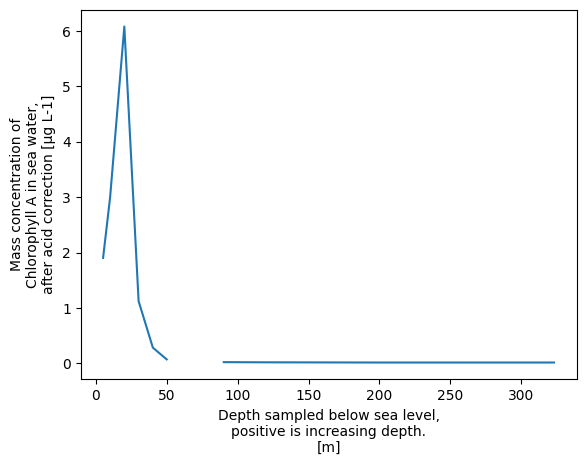

In [105]:
# Plotting
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'])
plt.show()

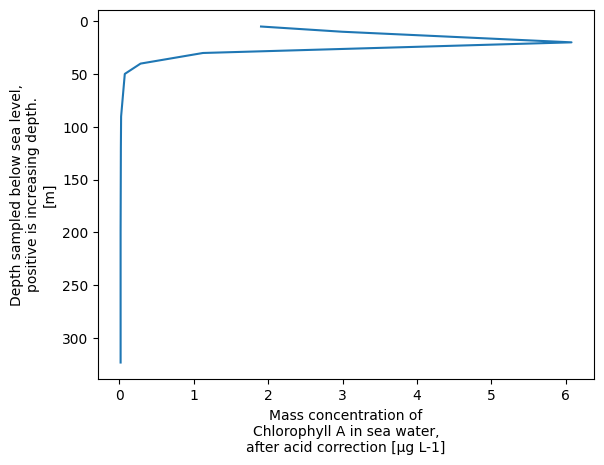

In [106]:
xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'), y ='DEPTH', yincrease = False)
plt.show()

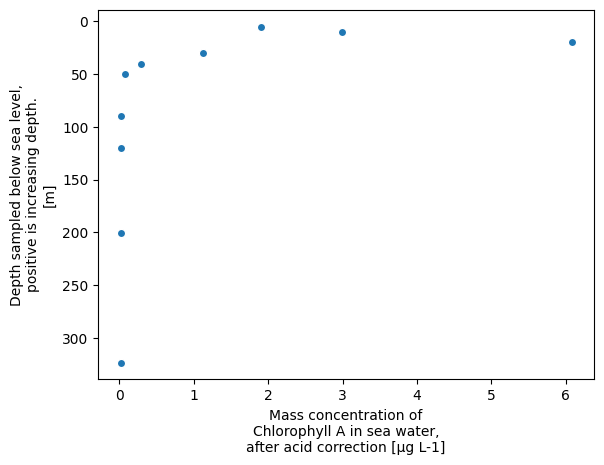

In [107]:
# Scattered Plot
xrds.plot.scatter(x='CHLOROPHYLL_A_TOTAL', y='DEPTH', yincrease=False)
plt.show()

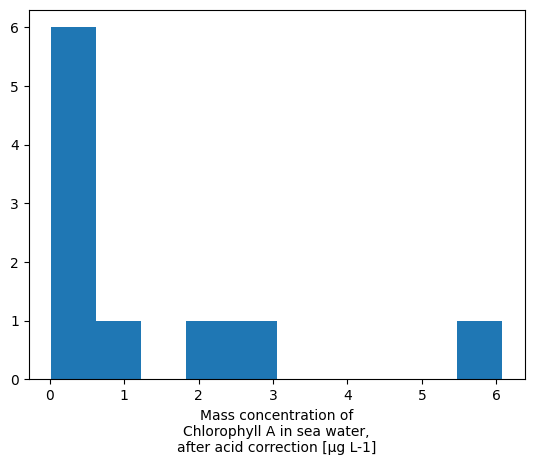

In [108]:
# Histogram

xrds['CHLOROPHYLL_A_TOTAL'].plot.hist()

plt.show()

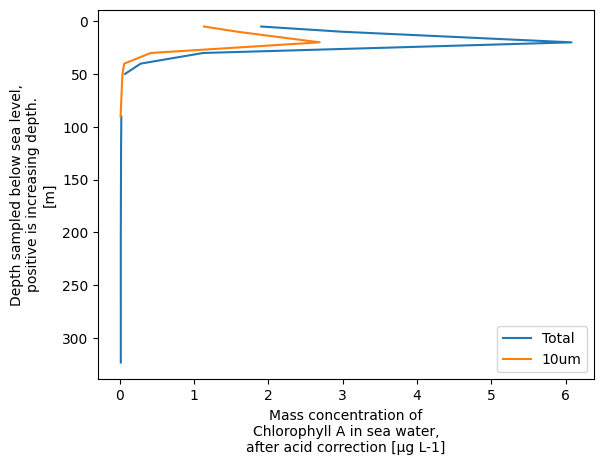

In [109]:
# Histogram

xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='Total')
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um')
plt.legend()
plt.show()

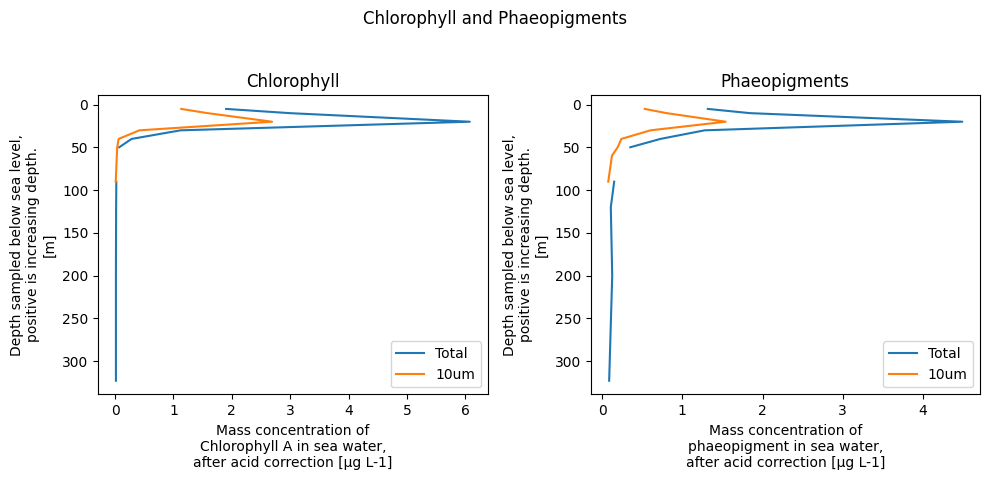

In [110]:
# Set up the figure and subplots

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

xrds['CHLOROPHYLL_A_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='Total', ax =axes[0])
xrds['CHLOROPHYLL_A_10um'].plot.line(y='DEPTH', yincrease=False, label='10um', ax = axes[0])
axes[0].set_title('Chlorophyll')
axes[0].legend()

xrds['PHAEOPIGMENTS_TOTAL'].plot.line(y='DEPTH', yincrease=False, label='Total', ax = axes[1])
xrds['PHAEOPIGMENTS_10um'].plot.line(y='DEPTH', yincrease=False, label='10um', ax = axes[1])
axes[1].set_title('Phaeopigments')
axes[1].legend()

# Adjust the Layout and display the plot
plt.suptitle('Chlorophyll and Phaeopigments')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [111]:
# Visualizing NOAA Gloabl Surface Temperature Dataset, version 5.0

url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 18MB
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (time, z, lat, lon) float32 18MB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

In [112]:
print(xrds['anom'])

<xarray.DataArray 'anom' (time: 1716, z: 1, lat: 36, lon: 72)> Size: 18MB
[4447872 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Attributes:
    long_name:              Global Temperature Anomalies
    standard_name:          surface_temperature_anomaly
    coverage_content_type:  physicalMeasurement
    units:                  degrees C
    valid_min:              -40.0
    valid_max:              40.0


In [113]:
#plotting

desired_date = '2022-12-01'
data_for_desired_date = xrds.sel(time=desired_date)
print(data_for_desired_date)

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 36, lon: 72, z: 1)
Coordinates:
    time     datetime64[ns] 8B 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (z, lat, lon) float32 10kB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                

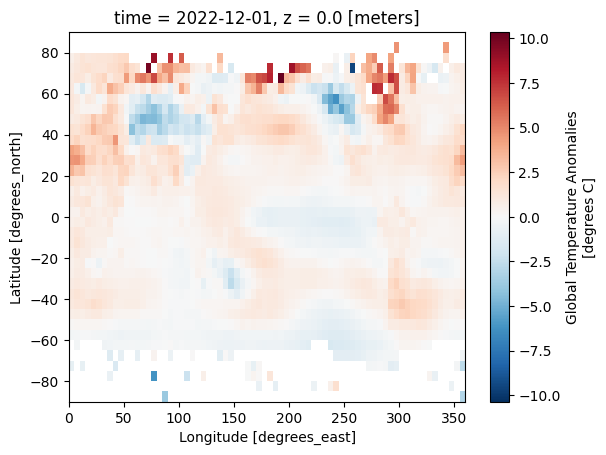

In [114]:
data_for_desired_date['anom'].plot()
plt.show()

In [115]:
import cartopy.crs as ccrs

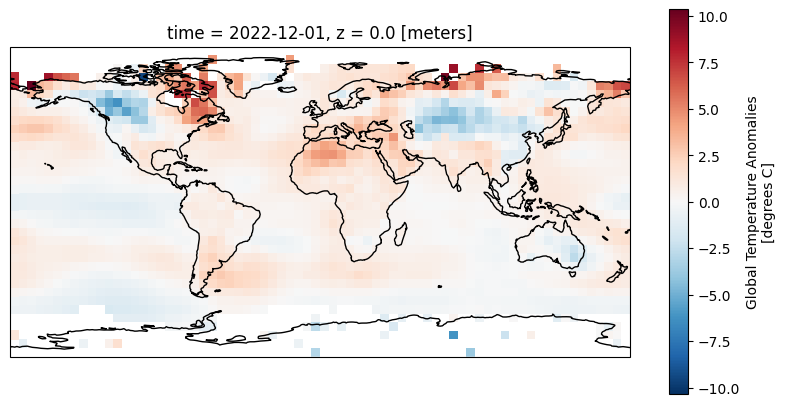

In [116]:
plt.figure(figsize = (10,5))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()

data_for_desired_date['anom'].plot(transform = ccrs.PlateCarree(), cmap = 'RdBu_r')
plt.show()

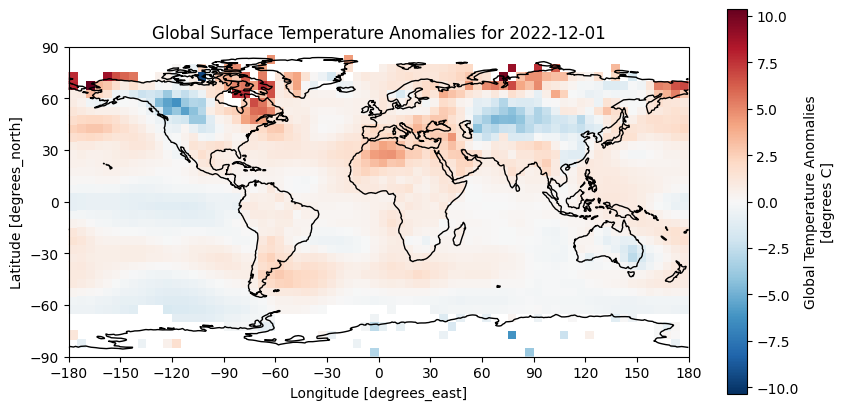

In [117]:
plt.figure(figsize = (10,5))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.set_xticks(range(-180, 181, 30), crs = ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs = ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

data_for_desired_date['anom'].plot(transform = ccrs.PlateCarree(), cmap = 'RdBu_r')

plt.title(f'Global Surface Temperature Anomalies for {desired_date}')
plt.show()

40.0 40.0


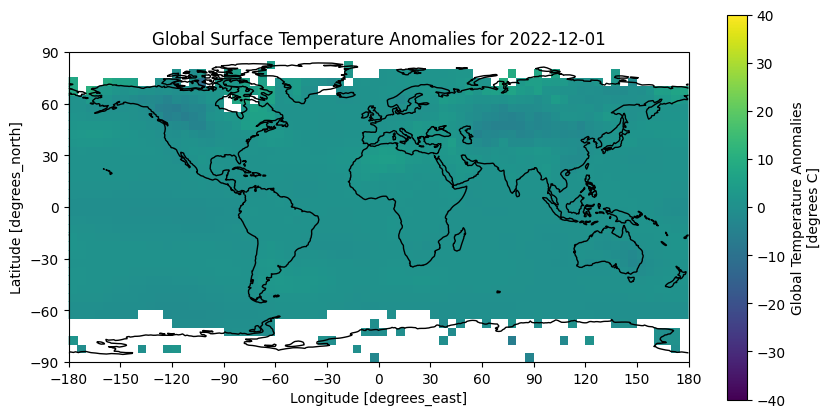

In [118]:
vmin = xrds['anom'].attrs['valid_min']
vmax = xrds['anom'].attrs['valid_max']
vmin_abs = abs(vmin)
vmax_abs = abs(vmax)
print(vmin_abs, vmax_abs)

plt.figure(figsize = (10,5))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.set_xticks(range(-180, 181, 30), crs = ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs = ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

data_for_desired_date['anom'].plot(vmin=-vmin_abs, vmax= vmax_abs)

plt.title(f'Global Surface Temperature Anomalies for {desired_date}')
plt.show()

40.0 40.0


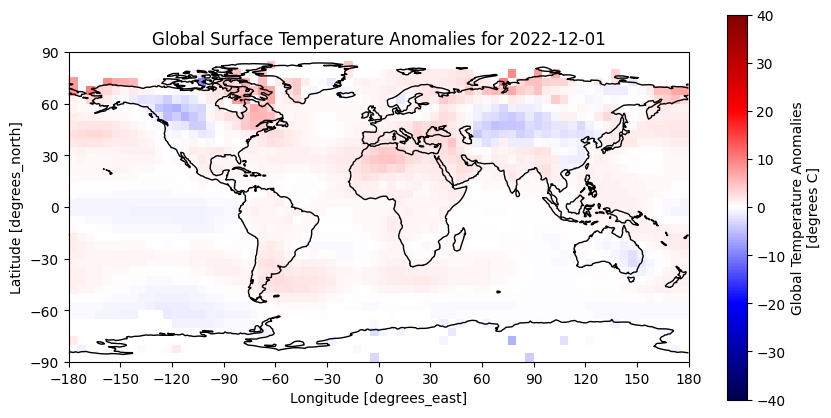

In [119]:
vmin = xrds['anom'].attrs['valid_min']
vmax = xrds['anom'].attrs['valid_max']
vmin_abs = abs(vmin)
vmax_abs = abs(vmax)
print(vmin_abs, vmax_abs)

plt.figure(figsize = (10,5))
ax = plt.axes(projection = ccrs.PlateCarree())
ax.coastlines()
ax.set_xticks(range(-180, 181, 30), crs = ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs = ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

data_for_desired_date['anom'].plot(vmin=-vmin_abs, vmax= vmax_abs, cmap = 'seismic')

plt.title(f'Global Surface Temperature Anomalies for {desired_date}')
plt.show()